# Used Car Price Prediction Model

This model aims to predict the selling price of cars in the Indian market based on various features such as year, km driven, mileage, etc. The data has been collected from CarDekho.com, an online platform for car sales in India, via web-scraping and published to Kaggle by Manish Kumar.

Dataset: https://www.kaggle.com/datasets/manishkr1754/cardekho-used-car-data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cardekho_dataset.csv', index_col = 0)

In [3]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


## Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15411 entries, 0 to 19543
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   mileage            15411 non-null  float64
 9   engine             15411 non-null  int64  
 10  max_power          15411 non-null  float64
 11  seats              15411 non-null  int64  
 12  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.6+ MB


In [5]:
df.describe()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


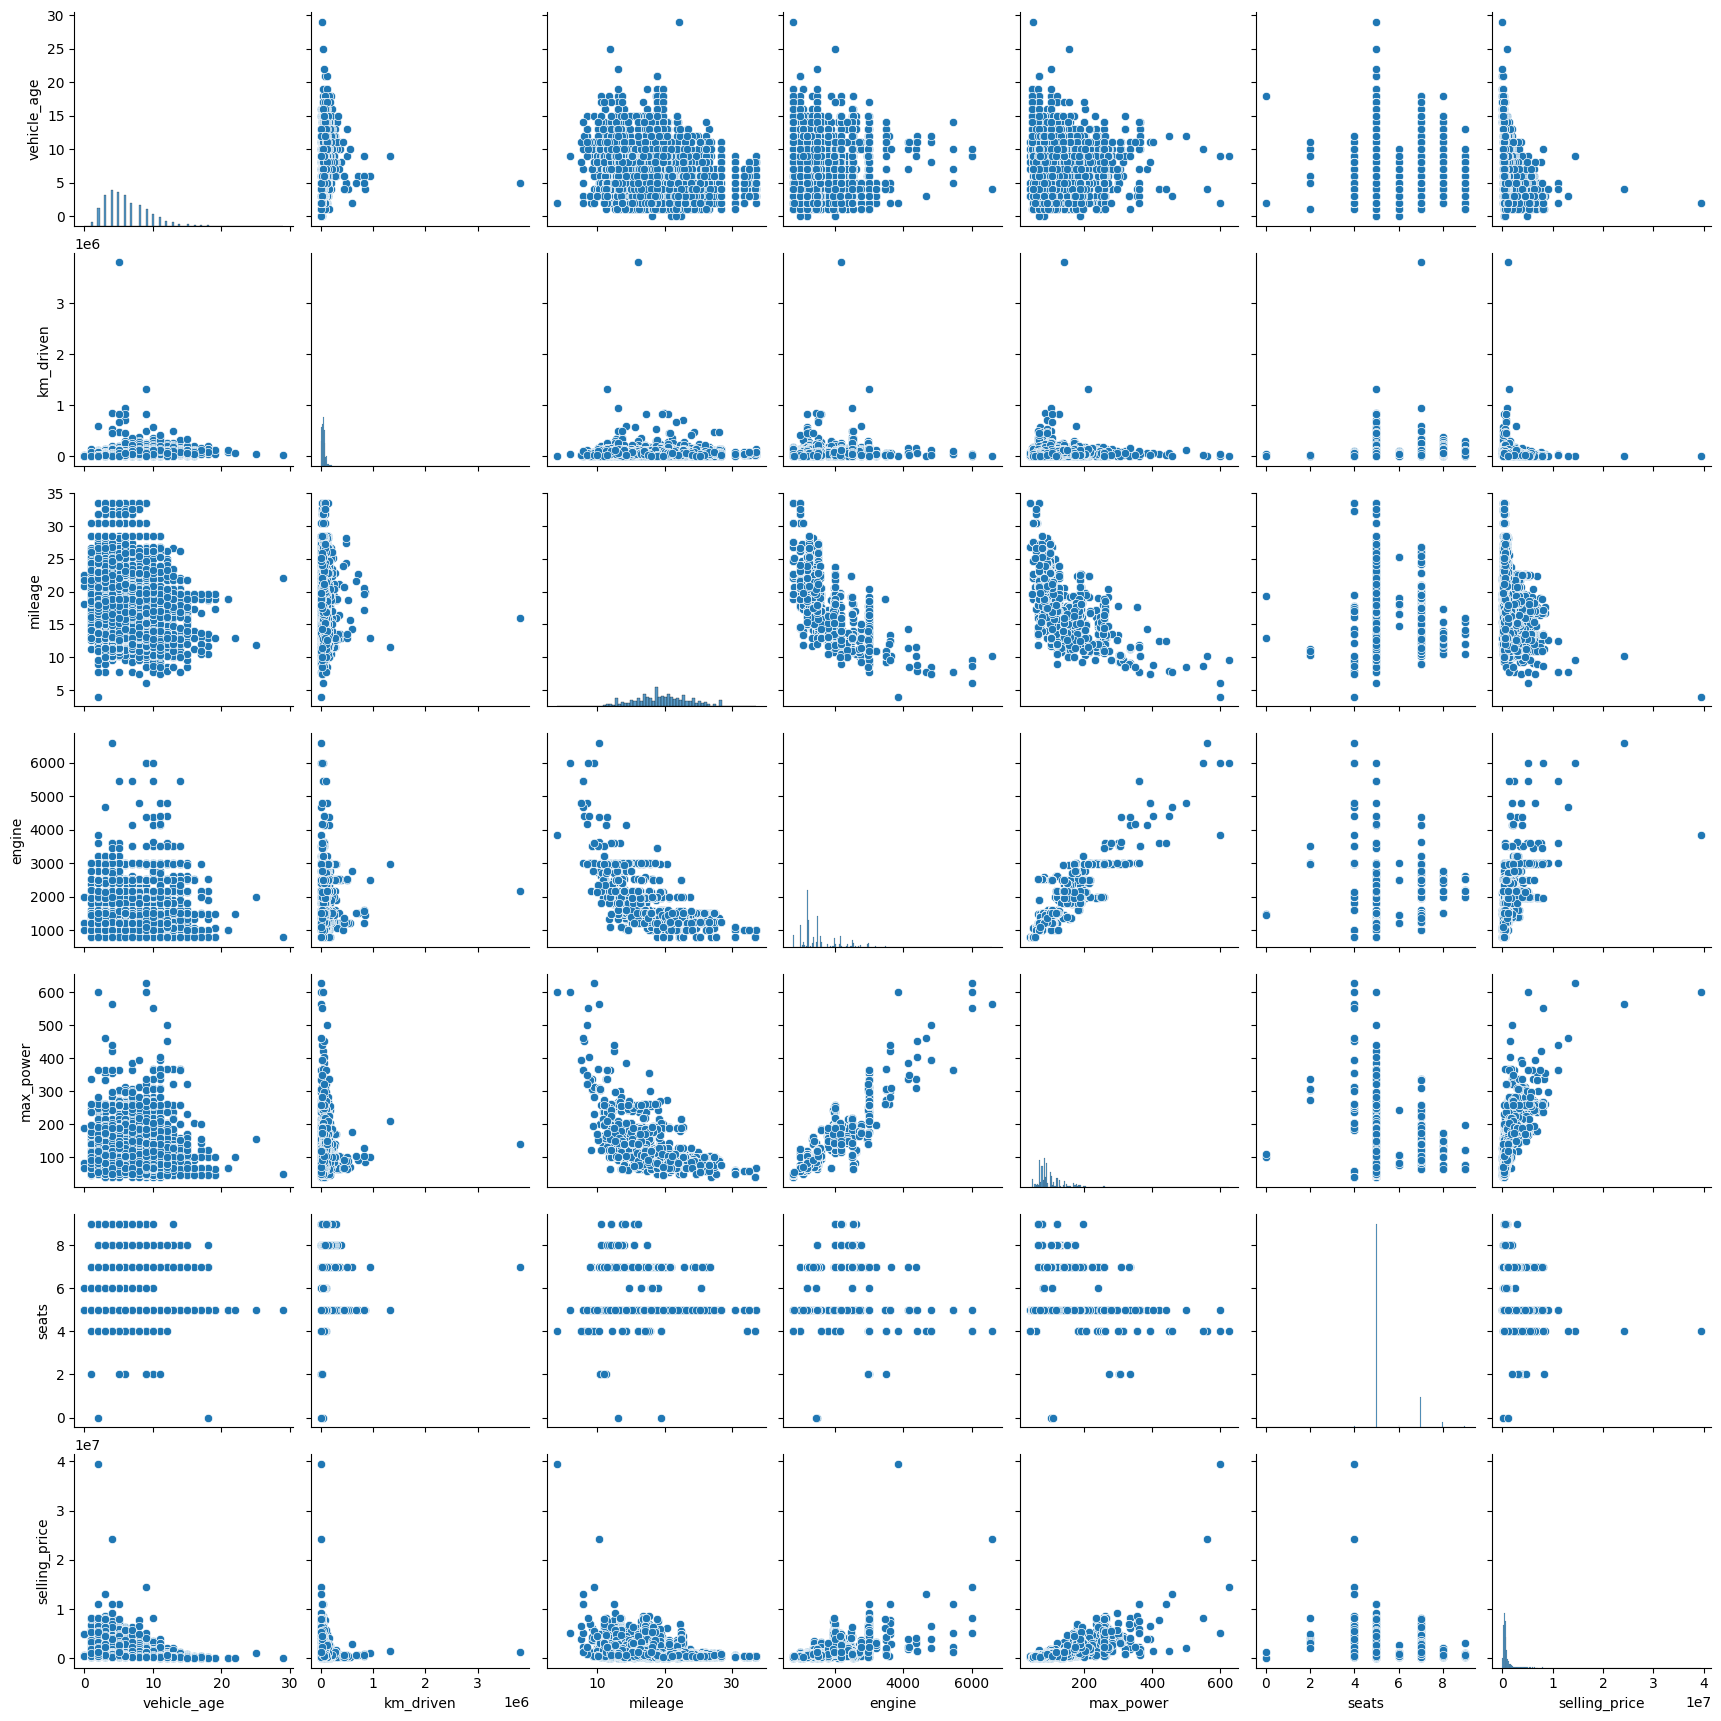

In [6]:
sns.pairplot(data = df)

<Axes: >

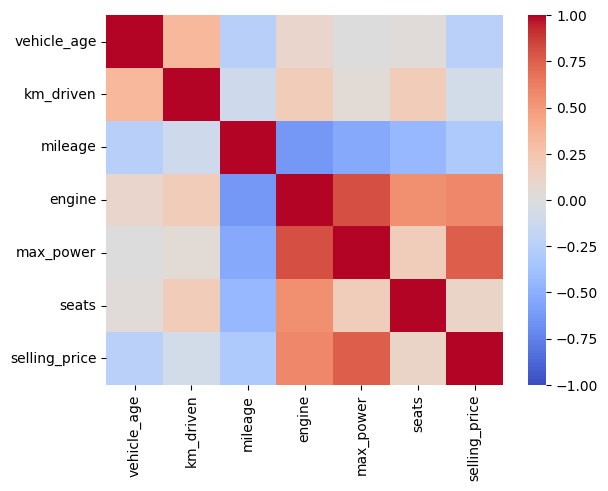

In [7]:
sns.heatmap(df.corr(numeric_only=True), vmin = -1, cmap = 'coolwarm')

<Axes: xlabel='selling_price', ylabel='Count'>

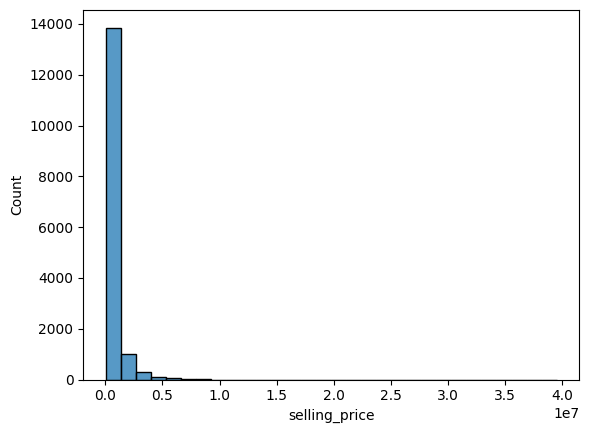

In [8]:
sns.histplot(data = df, x = 'selling_price', bins = 30)

## Data Cleaning

In [9]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [10]:
df.isnull().sum()

car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

In [11]:
## Check data types
df.dtypes

car_name              object
brand                 object
model                 object
vehicle_age            int64
km_driven              int64
seller_type           object
fuel_type             object
transmission_type     object
mileage              float64
engine                 int64
max_power            float64
seats                  int64
selling_price          int64
dtype: object

In [12]:
## Check categorical columns for incorrect formatting/duplicates

# Drop car_name as it is a duplicate of brand/model
df = df.drop('car_name', axis = 1)
df.head()

,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [13]:
df['brand'].unique()

array(['Maruti', 'Hyundai', 'Ford', 'Renault', 'Mini', 'Mercedes-Benz',
       'Toyota', 'Volkswagen', 'Honda', 'Mahindra', 'Datsun', 'Tata',
       'Kia', 'BMW', 'Audi', 'Land Rover', 'Jaguar', 'MG', 'Isuzu',
       'Porsche', 'Skoda', 'Volvo', 'Lexus', 'Jeep', 'Maserati',
       'Bentley', 'Nissan', 'ISUZU', 'Ferrari', 'Mercedes-AMG',
       'Rolls-Royce', 'Force'], dtype=object)

In [14]:
df['brand'].value_counts()

brand
Maruti           4992
Hyundai          2982
Honda            1485
Mahindra         1011
Toyota            793
Ford              790
Volkswagen        620
Renault           536
BMW               439
Tata              430
Mercedes-Benz     337
Skoda             334
Audi              192
Datsun            170
Jaguar             59
Land Rover         51
Jeep               41
Kia                32
Porsche            21
Volvo              20
MG                 19
Mini               17
Nissan             11
Lexus              10
Isuzu               8
Bentley             3
Maserati            2
ISUZU               2
Ferrari             1
Mercedes-AMG        1
Rolls-Royce         1
Force               1
Name: count, dtype: int64

In [15]:
## Correcting duplicate 'ISUZU'
df['brand'] = df['brand'].replace('ISUZU', 'Isuzu')
df.head()

,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [16]:
df['brand'].unique()

array(['Maruti', 'Hyundai', 'Ford', 'Renault', 'Mini', 'Mercedes-Benz',
       'Toyota', 'Volkswagen', 'Honda', 'Mahindra', 'Datsun', 'Tata',
       'Kia', 'BMW', 'Audi', 'Land Rover', 'Jaguar', 'MG', 'Isuzu',
       'Porsche', 'Skoda', 'Volvo', 'Lexus', 'Jeep', 'Maserati',
       'Bentley', 'Nissan', 'Ferrari', 'Mercedes-AMG', 'Rolls-Royce',
       'Force'], dtype=object)

In [17]:
df['brand'].value_counts()

brand
Maruti           4992
Hyundai          2982
Honda            1485
Mahindra         1011
Toyota            793
Ford              790
Volkswagen        620
Renault           536
BMW               439
Tata              430
Mercedes-Benz     337
Skoda             334
Audi              192
Datsun            170
Jaguar             59
Land Rover         51
Jeep               41
Kia                32
Porsche            21
Volvo              20
MG                 19
Mini               17
Nissan             11
Lexus              10
Isuzu              10
Bentley             3
Maserati            2
Ferrari             1
Mercedes-AMG        1
Rolls-Royce         1
Force               1
Name: count, dtype: int64

In [18]:
df['model'].unique()

array(['Alto', 'Grand', 'i20', 'Ecosport', 'Wagon R', 'i10', 'Venue',
       'Swift', 'Verna', 'Duster', 'Cooper', 'Ciaz', 'C-Class', 'Innova',
       'Baleno', 'Swift Dzire', 'Vento', 'Creta', 'City', 'Bolero',
       'Fortuner', 'KWID', 'Amaze', 'Santro', 'XUV500', 'KUV100', 'Ignis',
       'RediGO', 'Scorpio', 'Marazzo', 'Aspire', 'Figo', 'Vitara',
       'Tiago', 'Polo', 'Seltos', 'Celerio', 'GO', '5', 'CR-V',
       'Endeavour', 'KUV', 'Jazz', '3', 'A4', 'Tigor', 'Ertiga', 'Safari',
       'Thar', 'Hexa', 'Rover', 'Eeco', 'A6', 'E-Class', 'Q7', 'Z4', '6',
       'XF', 'X5', 'Hector', 'Civic', 'D-Max', 'Cayenne', 'X1', 'Rapid',
       'Freestyle', 'Superb', 'Nexon', 'XUV300', 'Dzire VXI', 'S90',
       'WR-V', 'XL6', 'Triber', 'ES', 'Wrangler', 'Camry', 'Elantra',
       'Yaris', 'GL-Class', '7', 'S-Presso', 'Dzire LXI', 'Aura', 'XC',
       'Ghibli', 'Continental', 'CR', 'Kicks', 'S-Class', 'Tucson',
       'Harrier', 'X3', 'Octavia', 'Compass', 'CLS', 'redi-GO', 'Glanza',
       

In [19]:
## Drop 'model' as there are too many and likely unrelated to price compared to 'brand'
df = df.drop('model', axis = 1)
df.head()

,brand,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [20]:
df['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [21]:
df['fuel_type'].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [22]:
df['transmission_type'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [23]:
## Observing that the min for 'seats' is 0

df[df['seats'] < 4]

,brand,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
397,BMW,1,2000,Dealer,Petrol,Automatic,11.29,2998,335.00,2,8250000
4098,Honda,18,40000,Individual,Petrol,Manual,13.00,1493,100.00,0,115000
10869,BMW,6,27000,Dealer,Petrol,Automatic,10.37,2979,301.72,2,3999000
13244,BMW,5,17000,Dealer,Petrol,Automatic,10.37,2979,301.72,2,4800000
14283,BMW,9,33000,Dealer,Petrol,Automatic,10.37,2979,301.72,2,3425000
15169,BMW,10,24000,Dealer,Petrol,Automatic,10.37,2979,306.00,2,3300000
15992,Nissan,2,10000,Individual,Diesel,Manual,19.39,1461,108.49,0,1154000
16255,BMW,11,5022,Dealer,Petrol,Automatic,10.37,2979,306.00,2,3100000
16554,Mercedes-Benz,9,23000,Dealer,Petrol,Automatic,10.93,3498,272.00,2,1996000


In [24]:
df['seats'].value_counts()

seats
5    12910
7     1922
8      311
6      127
4       77
9       55
2        7
0        2
Name: count, dtype: int64

In [25]:
# Replacing the rows with 'seats' = 0 with the mode (5 seats)

df['seats'] = df['seats'].replace(0, 5)
df['seats'].value_counts()

seats
5    12912
7     1922
8      311
6      127
4       77
9       55
2        7
Name: count, dtype: int64

## Feature Engineering

In [26]:
df.head()

,brand,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [27]:
df['brand'].value_counts()

brand
Maruti           4992
Hyundai          2982
Honda            1485
Mahindra         1011
Toyota            793
Ford              790
Volkswagen        620
Renault           536
BMW               439
Tata              430
Mercedes-Benz     337
Skoda             334
Audi              192
Datsun            170
Jaguar             59
Land Rover         51
Jeep               41
Kia                32
Porsche            21
Volvo              20
MG                 19
Mini               17
Nissan             11
Lexus              10
Isuzu              10
Bentley             3
Maserati            2
Ferrari             1
Mercedes-AMG        1
Rolls-Royce         1
Force               1
Name: count, dtype: int64

In [28]:
brand_freq_map = df['brand'].value_counts().to_dict()
brand_freq_map

{'Maruti': 4992,
 'Hyundai': 2982,
 'Honda': 1485,
 'Mahindra': 1011,
 'Toyota': 793,
 'Ford': 790,
 'Volkswagen': 620,
 'Renault': 536,
 'BMW': 439,
 'Tata': 430,
 'Mercedes-Benz': 337,
 'Skoda': 334,
 'Audi': 192,
 'Datsun': 170,
 'Jaguar': 59,
 'Land Rover': 51,
 'Jeep': 41,
 'Kia': 32,
 'Porsche': 21,
 'Volvo': 20,
 'MG': 19,
 'Mini': 17,
 'Nissan': 11,
 'Lexus': 10,
 'Isuzu': 10,
 'Bentley': 3,
 'Maserati': 2,
 'Ferrari': 1,
 'Mercedes-AMG': 1,
 'Rolls-Royce': 1,
 'Force': 1}

In [29]:
import joblib

joblib.dump(brand_freq_map, "webapp/brand_freq_map.joblib")

['webapp/brand_freq_map.joblib']

In [29]:
df['brand'].nunique()

31

In [30]:
## Frequency encoding for brand
brand_freq = df['brand'].value_counts()
df['brand_freq'] = df['brand'].map(brand_freq)
df.head()

,brand,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price,brand_freq
0,Maruti,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000,4992
1,Hyundai,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000,2982
2,Hyundai,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000,2982
3,Maruti,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000,4992
4,Ford,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000,790


In [31]:
df = df.drop('brand', axis = 1)
df.head()

,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price,brand_freq
0,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000,4992
1,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000,2982
2,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000,2982
3,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000,4992
4,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000,790


In [32]:
df['seller_type'].value_counts()

seller_type
Dealer              9539
Individual          5699
Trustmark Dealer     173
Name: count, dtype: int64

In [33]:
df['fuel_type'].value_counts()

fuel_type
Petrol      7643
Diesel      7419
CNG          301
LPG           44
Electric       4
Name: count, dtype: int64

In [34]:
df['transmission_type'].value_counts()

transmission_type
Manual       12225
Automatic     3186
Name: count, dtype: int64

In [35]:
seller_dummies = pd.get_dummies(df['seller_type'], drop_first = True, dtype = int)
df = pd.concat([df.drop('seller_type', axis = 1), seller_dummies], axis = 1)
df.head()

,vehicle_age,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price,brand_freq,Individual,Trustmark Dealer
0,9,120000,Petrol,Manual,19.70,796,46.30,5,120000,4992,1,0
1,5,20000,Petrol,Manual,18.90,1197,82.00,5,550000,2982,1,0
2,11,60000,Petrol,Manual,17.00,1197,80.00,5,215000,2982,1,0
3,9,37000,Petrol,Manual,20.92,998,67.10,5,226000,4992,1,0
4,6,30000,Diesel,Manual,22.77,1498,98.59,5,570000,790,0,0


In [36]:
fuel_dummies = pd.get_dummies(df['fuel_type'], drop_first = True, dtype = int)
df = pd.concat([df.drop('fuel_type', axis = 1), fuel_dummies], axis = 1)
df.head()

,vehicle_age,km_driven,transmission_type,mileage,engine,max_power,seats,selling_price,brand_freq,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol
0,9,120000,Manual,19.70,796,46.30,5,120000,4992,1,0,0,0,0,1
1,5,20000,Manual,18.90,1197,82.00,5,550000,2982,1,0,0,0,0,1
2,11,60000,Manual,17.00,1197,80.00,5,215000,2982,1,0,0,0,0,1
3,9,37000,Manual,20.92,998,67.10,5,226000,4992,1,0,0,0,0,1
4,6,30000,Manual,22.77,1498,98.59,5,570000,790,0,0,1,0,0,0


In [37]:
transmission_dummies = pd.get_dummies(df['transmission_type'], drop_first = True, dtype = int)
df = pd.concat([df.drop('transmission_type', axis = 1), transmission_dummies], axis = 1)
df.head()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price,brand_freq,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual
0,9,120000,19.70,796,46.30,5,120000,4992,1,0,0,0,0,1,1
1,5,20000,18.90,1197,82.00,5,550000,2982,1,0,0,0,0,1,1
2,11,60000,17.00,1197,80.00,5,215000,2982,1,0,0,0,0,1,1
3,9,37000,20.92,998,67.10,5,226000,4992,1,0,0,0,0,1,1
4,6,30000,22.77,1498,98.59,5,570000,790,0,0,1,0,0,0,1


In [38]:
df.dtypes

vehicle_age           int64
km_driven             int64
mileage             float64
engine                int64
max_power           float64
seats                 int64
selling_price         int64
brand_freq            int64
Individual            int64
Trustmark Dealer      int64
Diesel                int64
Electric              int64
LPG                   int64
Petrol                int64
Manual                int64
dtype: object

## Model Training

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X = df.drop('selling_price', axis = 1)
y = df['selling_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Random Forest Regressor

In [41]:
from sklearn.ensemble import RandomForestRegressor

In [42]:
model = RandomForestRegressor(n_estimators = 500)

In [43]:
model.fit(X_train, y_train)

,n_estimators,500
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [44]:
y_pred = model.predict(X_test)

In [45]:
from sklearn import metrics

In [46]:
MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
print(f'MAE: {MAE}')
print(f'MSE: {MSE}')
print(f'RMSE: {RMSE}')

MAE: 107467.90914880126
MSE: 89020089690.90027
RMSE: 298362.3463021101


In [47]:
df['selling_price'].mean()

np.float64(774971.1164103562)

In [48]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R²:", r2)

R²: 0.8816321866094935


### Hyperparameter Selection

In [49]:
## Randomized Search
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [200, 500, 800],              # more trees = more stable, diminishing returns
    'max_depth': [None, 15, 25, 35],              # allow unrestricted, plus some caps
    'min_samples_split': [2, 5, 10],              # how many samples needed to split
    'min_samples_leaf': [1, 2, 4, 8],             # smooths predictions, often underrated
    'max_features': ['sqrt', 0.5, None]           # sqrt = default, try half features & full
}

In [50]:
random_search = RandomizedSearchCV(
    estimator= RandomForestRegressor(),
    param_distributions=param_grid,
    n_iter=30,
    cv=3,
    scoring='neg_root_mean_squared_error',
    random_state=42,
    n_jobs=-1,
    verbose = 3
)

random_search.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


,estimator,RandomForestRegressor()
,param_distributions,"{'max_depth': [None, 15, ...], 'max_features': ['sqrt', 0.5, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], ...}"
,n_iter,30
,scoring,'neg_root_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,3
,verbose,3
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [51]:
print(random_search.best_params_)

{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 15}


In [52]:
rs_pred = random_search.predict(X_test)

In [53]:
MAE = metrics.mean_absolute_error(y_test, rs_pred)
MSE = metrics.mean_squared_error(y_test, rs_pred)
RMSE = np.sqrt(MSE)
print(f'MAE: {MAE}')
print(f'MSE: {MSE}')
print(f'RMSE: {RMSE}')

MAE: 106533.27343232169
MSE: 97865316554.67426
RMSE: 312834.3276475174


In [54]:
print("R²:", r2_score(y_test, rs_pred))

R²: 0.8698709070326778


In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
params_grid = {
    'n_estimators': [100, 200, 500],              # more trees = more stable, diminishing returns
    'max_depth': [None, 10, 20],              # allow unrestricted, plus some caps
    'min_samples_split': [2, 5],              # how many samples needed to split
    'min_samples_leaf': [1, 2],             # smooths predictions
    'max_features': ['sqrt', 0.5, None]           # sqrt = default, try log2 features & full
}

In [57]:
grid = GridSearchCV(RandomForestRegressor(), params_grid, scoring = 'neg_root_mean_squared_error', cv = 3,verbose = 3, n_jobs = -1)
grid.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


,estimator,RandomForestRegressor()
,param_grid,"{'max_depth': [None, 10, ...], 'max_features': ['sqrt', 0.5, ...], 'min_samples_leaf': [1, 2], 'min_samples_split': [2, 5], ...}"
,scoring,'neg_root_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,3
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [58]:
print(grid.best_params_)

{'max_depth': None, 'max_features': 0.5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [59]:
grid_pred = grid.predict(X_test)

MAE = metrics.mean_absolute_error(y_test, grid_pred)
MSE = metrics.mean_squared_error(y_test, grid_pred)
RMSE = np.sqrt(MSE)
print(f'MAE: {MAE}')
print(f'MSE: {MSE}')
print(f'RMSE: {RMSE}')

MAE: 102658.63517879299
MSE: 69509035261.30493
RMSE: 263645.6623221875


In [60]:
print("R²:", r2_score(y_test, grid_pred))

R²: 0.9075755535258092


## Final Model

In [61]:
rf_model = RandomForestRegressor(n_estimators = 200, max_depth = 20, max_features = None, min_samples_leaf= 1, min_samples_split= 2, random_state = 42)

In [62]:
rf_model.fit(X_train, y_train)

,n_estimators,200
,criterion,'squared_error'
,max_depth,20
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [63]:
y_pred = rf_model.predict(X_test)

In [64]:
MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
print(f'MAE: {MAE}')
print(f'MSE: {MSE}')
print(f'RMSE: {RMSE}')
print("R²:", r2_score(y_test, y_pred))

MAE: 107013.0243406094
MSE: 86238187216.41907
RMSE: 293663.3910047677
R²: 0.8853312135832176


In [65]:
MAPE = metrics.mean_absolute_percentage_error(y_test, y_pred)
print(MAPE)

0.14122858497512564


In [67]:
joblib.dump(rf_model, "webapp/model.joblib")

['webapp/model.joblib']

In [83]:
X_test.iloc[0]

vehicle_age            12.00
km_driven           73000.00
mileage                20.36
engine               1197.00
max_power              78.90
seats                   5.00
brand_freq           2982.00
Individual              0.00
Trustmark Dealer        0.00
Diesel                  0.00
Electric                0.00
LPG                     0.00
Petrol                  1.00
Manual                  1.00
Name: 4259, dtype: float64

In [86]:
sample = np.array(X_test.iloc[0])
sample = sample.reshape(1,-1)
sample

array([[1.200e+01, 7.300e+04, 2.036e+01, 1.197e+03, 7.890e+01, 5.000e+00,
        2.982e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00]])

In [87]:
rf_model.predict(sample)

C:\Users\Vihaan Asthana\OneDrive\Desktop\CarPricePredictor\webapp\env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([243739.18969059])

In [88]:
y_pred[0]

np.float64(243739.18969058603)